In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

## Define the window functions

In [2]:
def box_window(M):
    return np.ones(2 * M + 1)

def triangle_window(M):
    return np.concatenate([np.arange(M) / M, (M - np.arange(M))/M, [0]])

def hann_window(M):
    n = np.arange(0, 2 * M + 1)
    return (0.5 - 0.5 * np.cos(2.0 * np.pi * n / (2 * M)))

def hamming_window(M):
    n = np.arange(0, 2 * M + 1)
    return (25/46 - 21/46 * np.cos(2.0 * np.pi * n / (2 * M)))

def blackman_window(M):
    n = np.arange(0, 2 * M + 1)
    return (0.42 - 0.5 * np.cos(2.0 * np.pi * n / (2 * M)) +
            0.08 * np.cos(4.0 * np.pi * n / (2 * M)))

def kaiser_window(M, alpha = 3.0):
    n = np.arange(0, 2 * M + 1)
    return np.i0(np.pi * alpha * np.sqrt(1 - (n / M - 1.0)**2)) / np.i0(np.pi * alpha)

## Function to compute the impulse response, $h[n]$, and frequency response, $H(e^{i\omega})$

In [3]:
def compute_h(M, cutoff, window):
    n = np.arange(-M, M + 1)
    n[M] = 1 # just avoiding warning message about divide by zero
    h = np.sin(cutoff * n) / (np.pi * n)
    h[M] = cutoff / np.pi # set value for n = 0
    h = h * window(M)

    # Zero pad
    L = 1000
    h_pad = np.concatenate([h, np.zeros(L - 2 * M - 1)])

    # Inverse DTFT
    H = np.fft.fftshift(np.fft.fft(h_pad))
    
    return [h, H]

## Functions for plotting everything

In [4]:
def plot_impulse_response(h):
    plt.figure(figsize = (10,4))
    markerline, stemlines, baseline = plt.stem(h, basefmt = '')
    plt.setp(stemlines, 'linewidth', 2)
    plt.setp(markerline, 'markersize', 8)
    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    plt.grid(color = 'white')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    plt.tight_layout(pad = 4)
    plt.xlabel('$n$')
    plt.ylabel("$h[n]$")
    plt.title("Impulse Response")
    
def plot_frequency_magnitude(H, decibels = False):
    L = H.shape[0]
    plt.figure(figsize = (10, 4))
    omega = np.arange(L) * 2.0 * np.pi / L - np.pi
    if decibels:
        plt.plot(omega[(L//2):L], 20*np.log10(np.abs(H[(L//2):L])))
    else:
        plt.plot(omega, np.abs(H))

    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.xaxis.set_major_formatter(FuncFormatter(
        lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if (val !=0 and val != np.pi and val != -np.pi) else '-$\pi$' if val == -np.pi else '$\pi$' if val == np.pi else '0'
))
    ax.xaxis.set_major_locator(MultipleLocator(base=np.pi*0.2))

    plt.grid(color = 'white')
    plt.tight_layout(pad = 3)

    plt.xlabel('$\omega$')
    if decibels:
        plt.ylabel("$|H(e^{i\omega})|$ in dB")
    else:
        plt.ylabel("$|H(e^{i\omega})|$")
    plt.title("Magnitude of Frequency Response")

def plot_windowed_sinc(M, cutoff, window, title):
    markerline, stemlines, baseline = plt.stem(np.arange(2 * M + 1), window(M), basefmt = '')
    plt.setp(stemlines, 'linewidth', 2)
    plt.setp(markerline, 'markersize', 8)
    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    plt.grid(color = 'white')
    plt.xlabel('$n$')
    plt.ylabel("$w[n]$")
    plt.title(title)
    plt.show()

    h, H = compute_h(M, cutoff, window)

    plot_impulse_response(h)
    plt.show()

    plot_frequency_magnitude(H)
    plt.show()

    plot_frequency_magnitude(H, decibels = True)
    plt.show()

def plot_multiple(M, cutoff, windows, labels = []):
    plt.figure(figsize = (10, 4))
   
    for w in windows:
        h, H = compute_h(M, cutoff, w)

        L = H.shape[0]
        omega = np.arange(L) * 2.0 * np.pi / L - np.pi
        plt.plot(omega[(L//2):L], 20*np.log10(np.abs(H[(L//2):L])))

    ax = plt.gca()
    ax.set_facecolor((0.9, 0.9, 0.9))
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    ax.xaxis.set_major_formatter(FuncFormatter(
        lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if (val !=0 and val != np.pi and val != -np.pi) else '-$\pi$' if val == -np.pi else '$\pi$' if val == np.pi else '0'
))
    ax.xaxis.set_major_locator(MultipleLocator(base = np.pi * 0.2))

    plt.grid(color = 'white')
    plt.tight_layout(pad = 3)

    plt.xlabel('$\omega$')
    plt.ylabel("$|H(e^{i\omega})|$ in dB")
    plt.title("Magnitude of Frequency Response")
    plt.legend(labels = labels)
    plt.show()

## Box Window

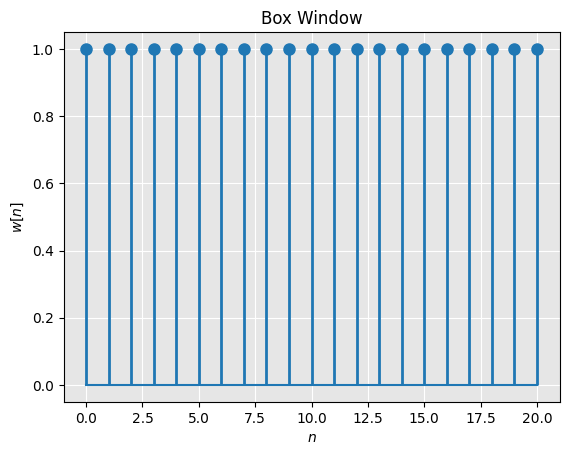

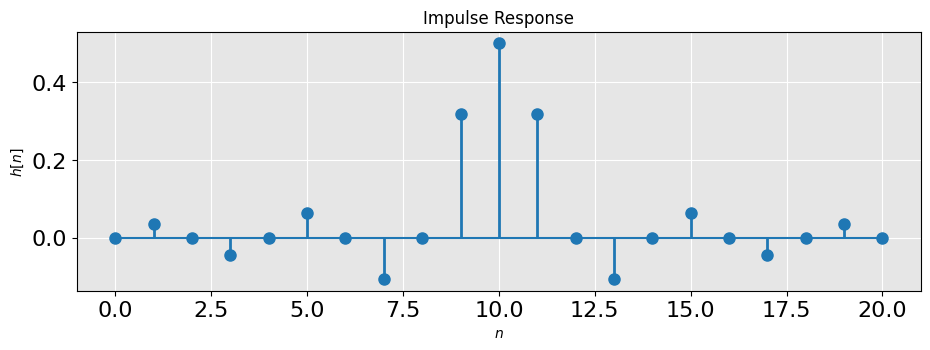

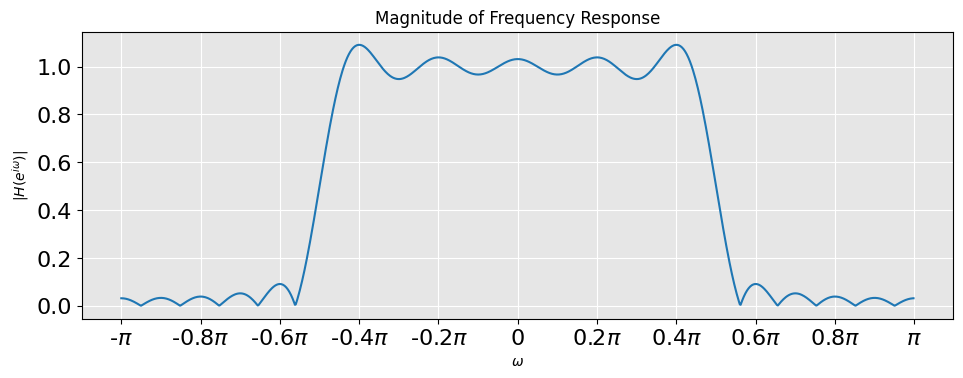

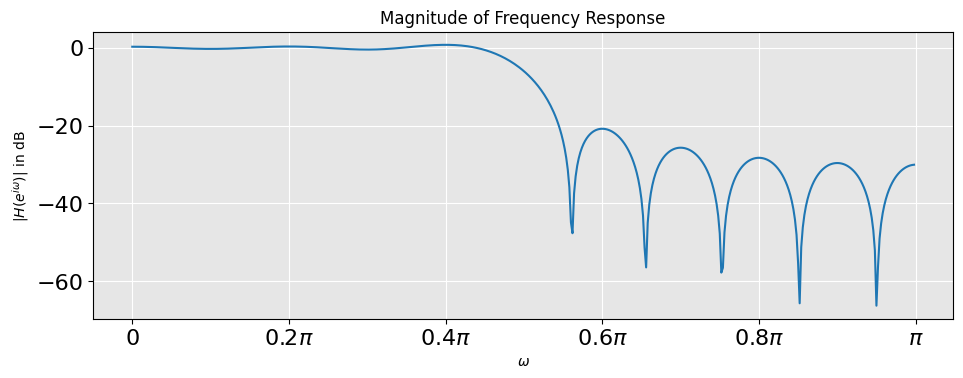

In [5]:
M = 10
cutoff = np.pi / 2

plot_windowed_sinc(M, cutoff, box_window, "Box Window")

## Triangle Window

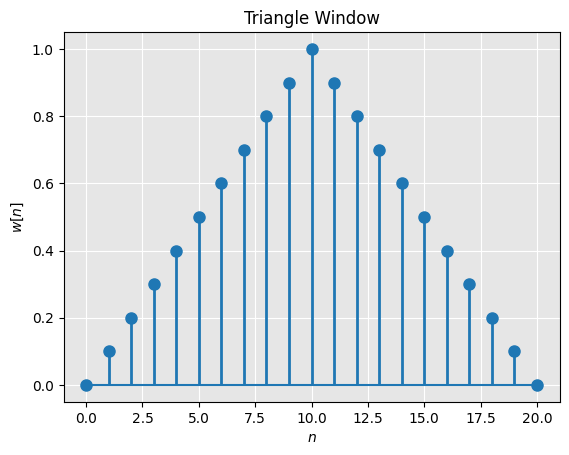

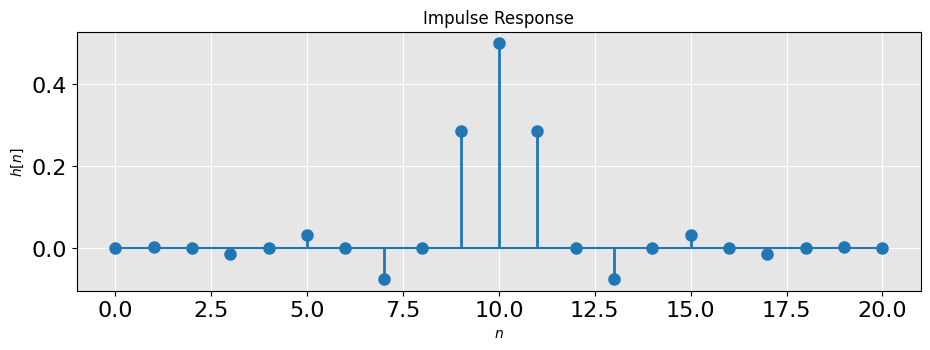

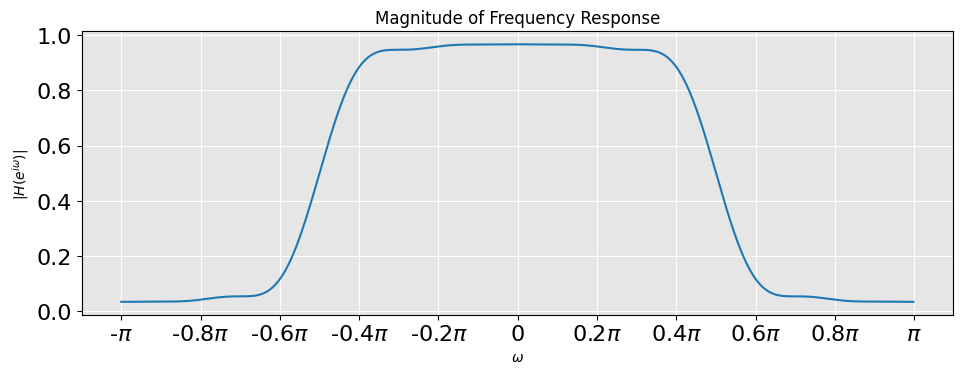

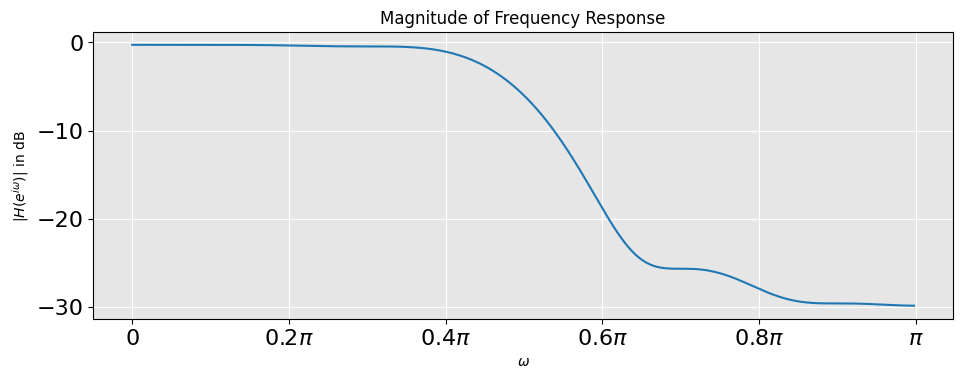

In [6]:
plot_windowed_sinc(M, cutoff, triangle_window, "Triangle Window")

## Hann Window

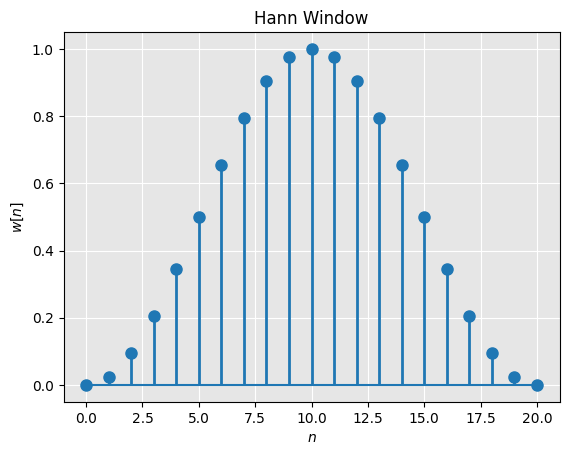

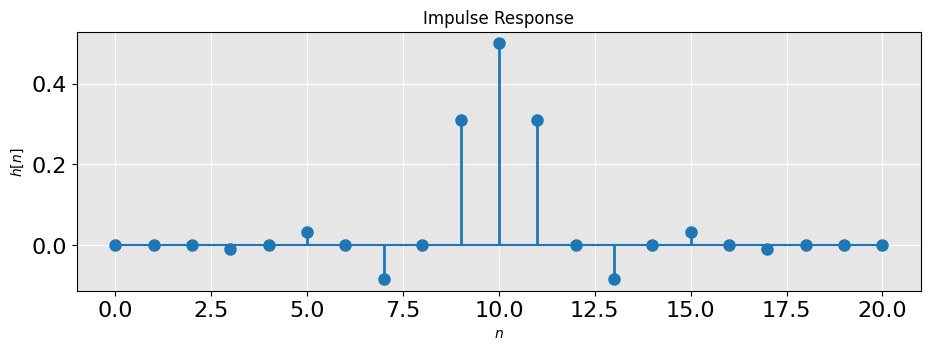

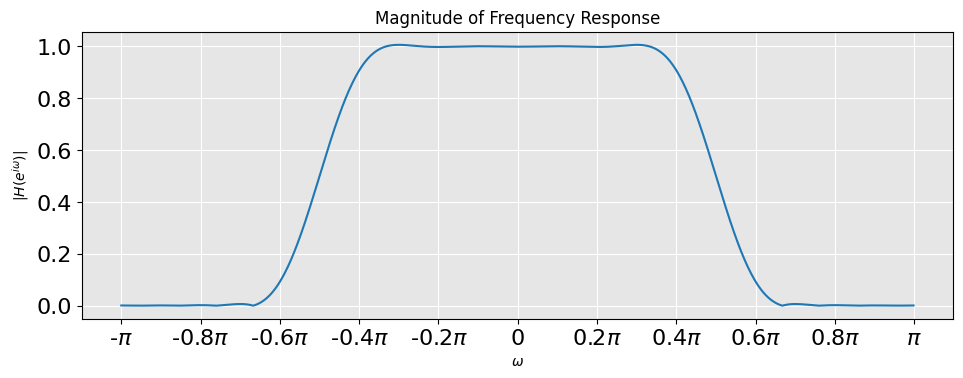

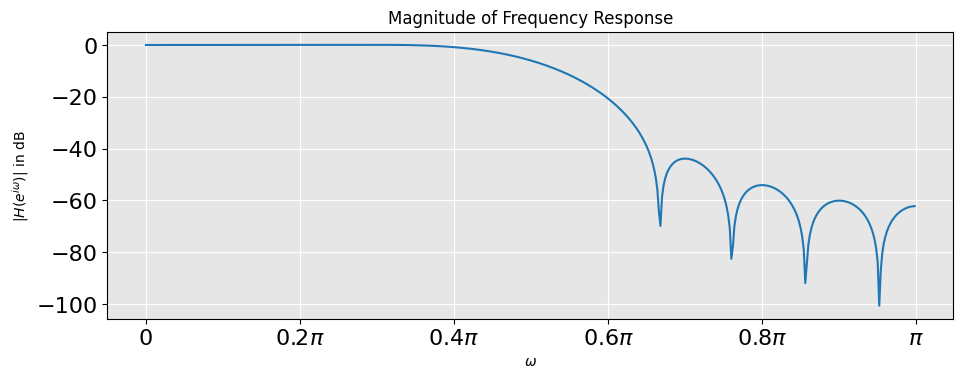

In [7]:
plot_windowed_sinc(M, cutoff, hann_window, "Hann Window")

## Hamming Window

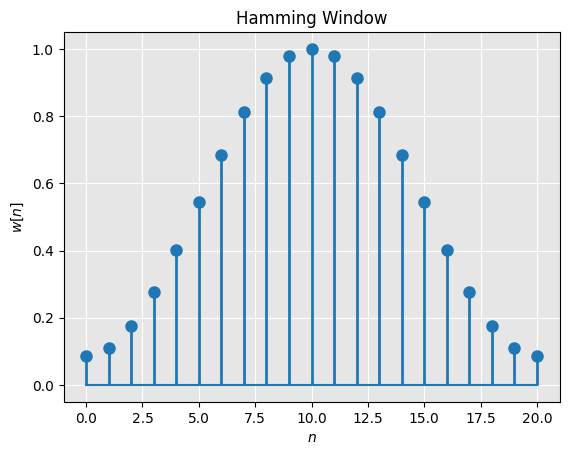

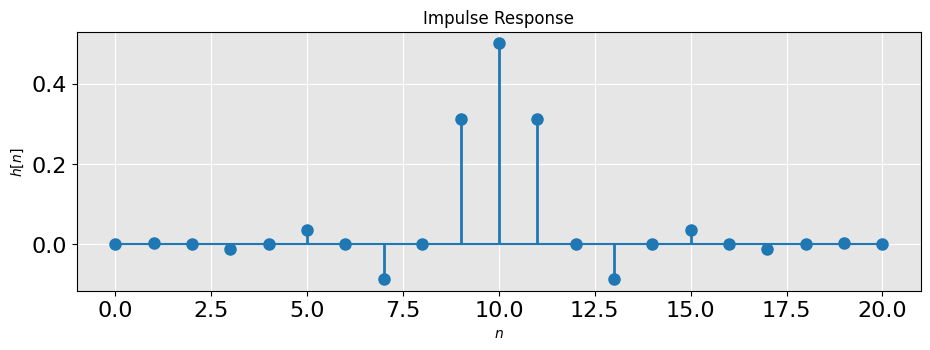

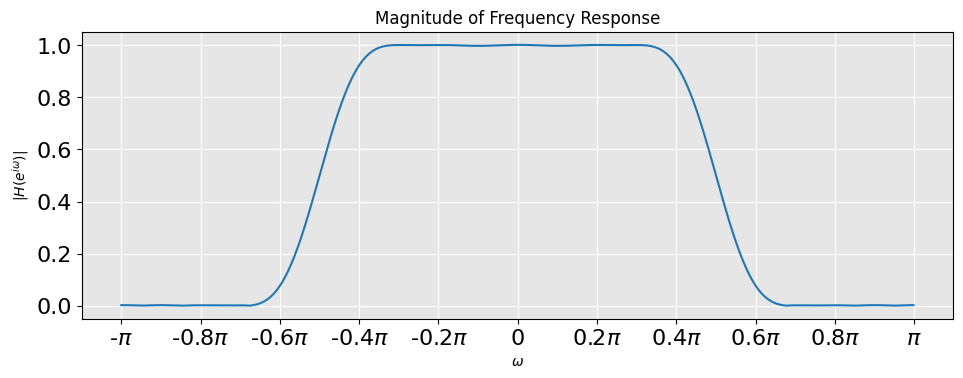

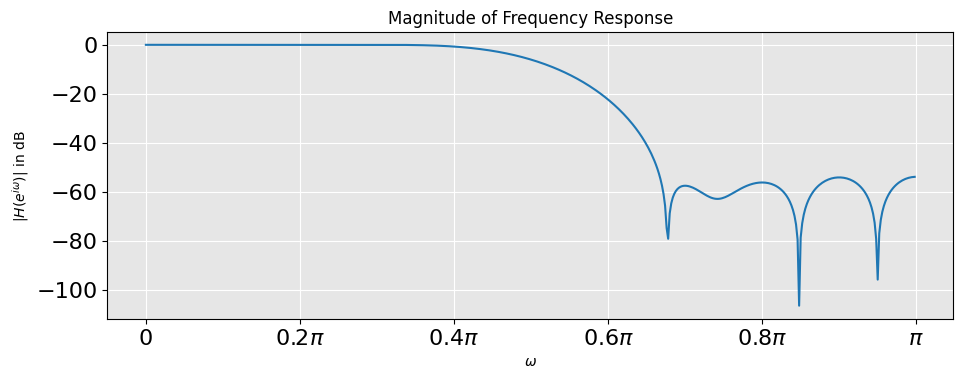

In [8]:
plot_windowed_sinc(M, cutoff, hamming_window, "Hamming Window")

## Blackman Window

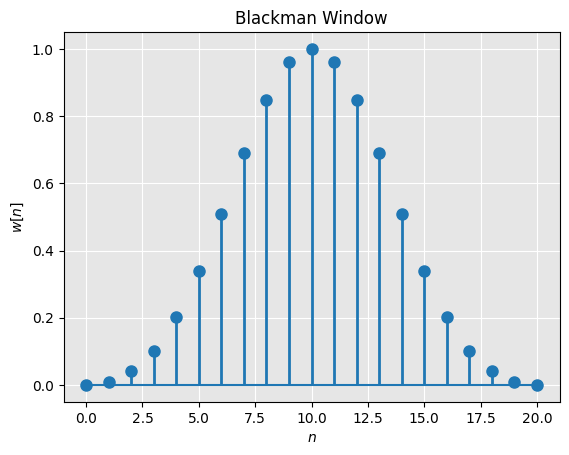

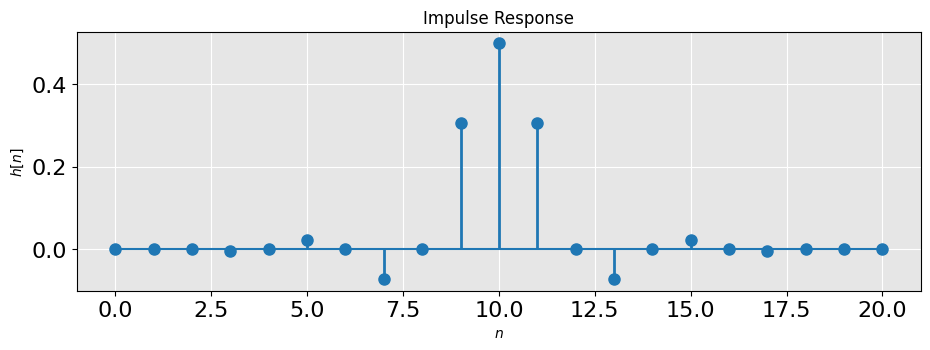

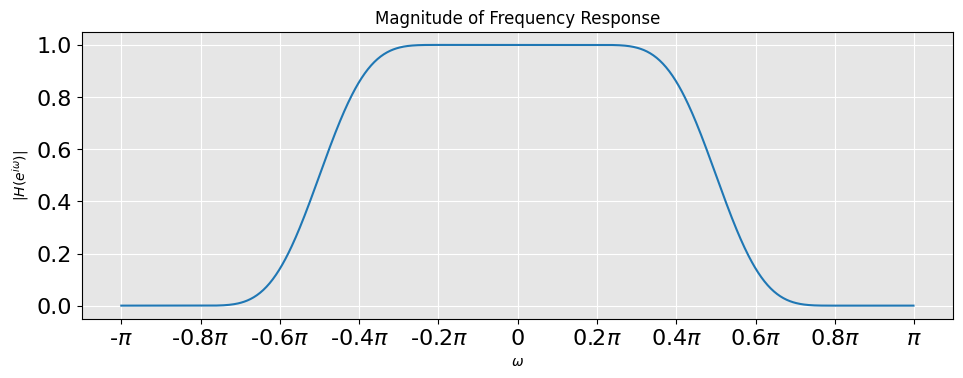

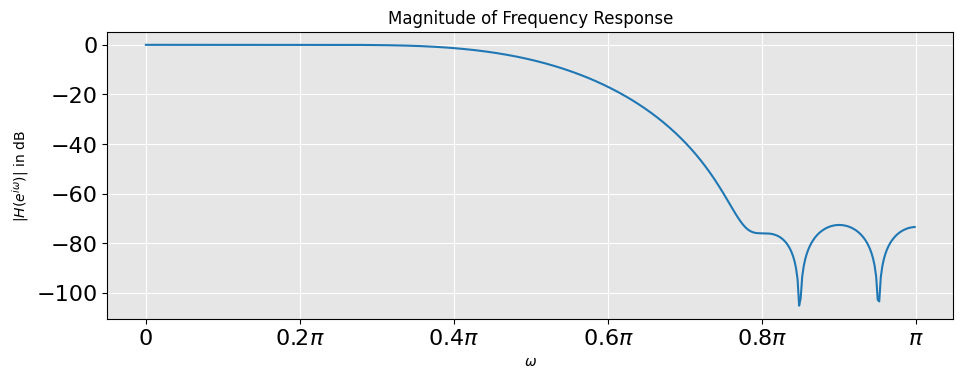

In [9]:
plot_windowed_sinc(M, cutoff, blackman_window, "Blackman Window")

## Kaiser Window

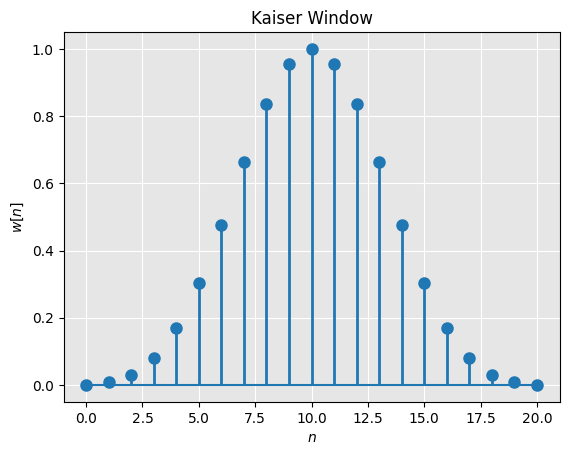

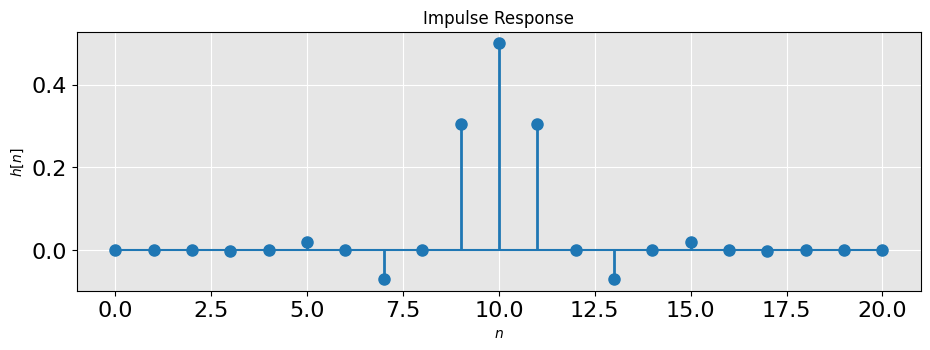

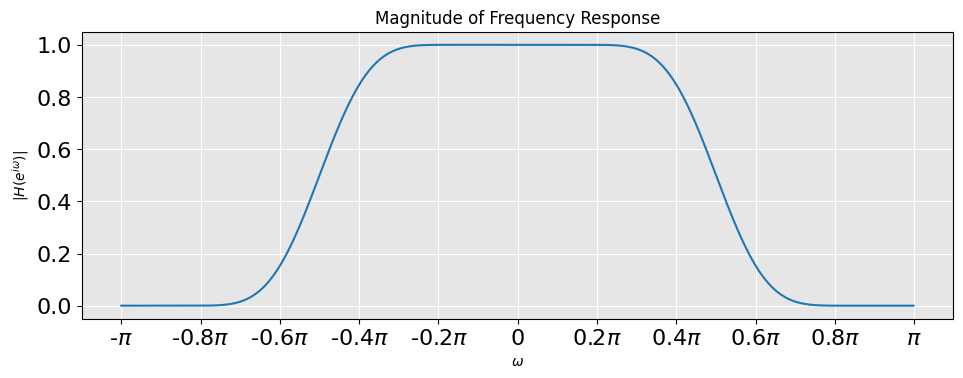

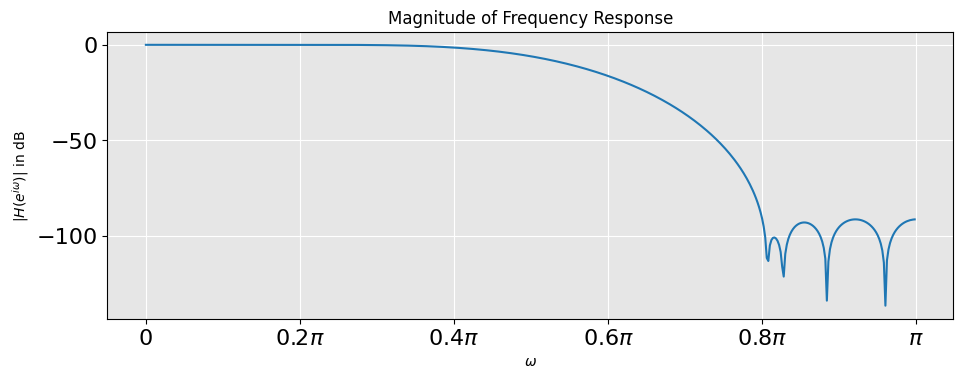

In [10]:
plot_windowed_sinc(M, cutoff, kaiser_window, "Kaiser Window")

## Effect of changing $\alpha$ in Kaiser window

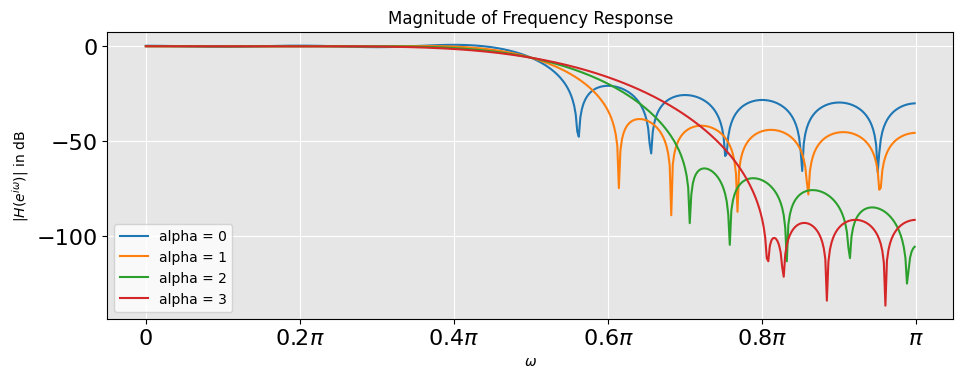

In [11]:
windows = [lambda M, a=a: kaiser_window(M, alpha = a) for a in [0.0, 1.0, 2.0, 3.0]]
plot_multiple(M, cutoff, windows, labels = ["alpha = 0", "alpha = 1", "alpha = 2", "alpha = 3"])

## Comparing Different Windows

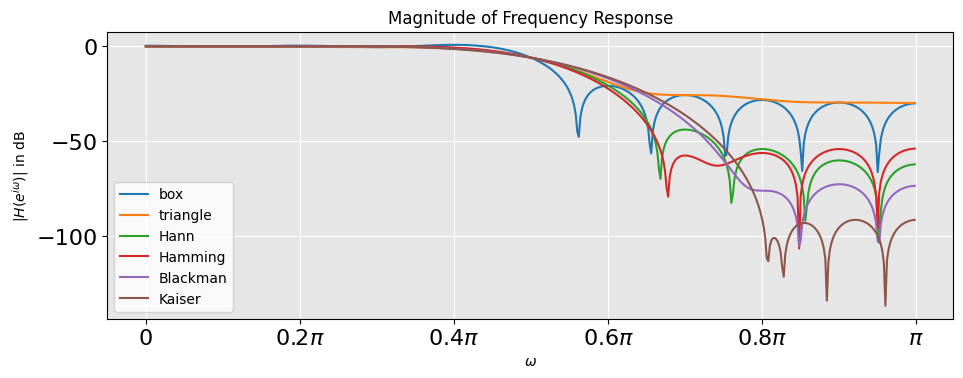

In [12]:
plot_multiple(M, cutoff, 
              [box_window, triangle_window, hann_window, hamming_window, blackman_window, lambda M: kaiser_window(M, alpha = 3.0)],
              labels = ["box", "triangle", "Hann", "Hamming", "Blackman", "Kaiser"])

## Effect of Window Size

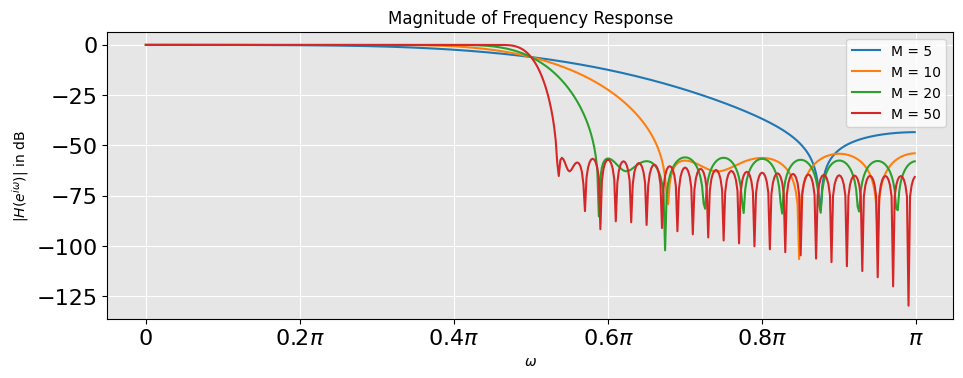

In [13]:
window = hamming_window

plt.figure(figsize = (10, 4))
   
for M in [5, 10, 20, 50]:
    h, H = compute_h(M, cutoff, window)

    L = H.shape[0]
    omega = np.arange(L) * 2.0 * np.pi / L - np.pi
    plt.plot(omega[(L//2):L], 20*np.log10(np.abs(H[(L//2):L])))

ax = plt.gca()
ax.set_facecolor((0.9, 0.9, 0.9))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(
    lambda val,pos: '{:.1f}$\pi$'.format(val/np.pi) if (val !=0 and val != np.pi and val != -np.pi) else '-$\pi$' if val == -np.pi else '$\pi$' if val == np.pi else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base = np.pi * 0.2))

plt.grid(color = 'white')
plt.tight_layout(pad = 3)

plt.xlabel('$\omega$')
plt.ylabel("$|H(e^{i\omega})|$ in dB")
plt.title("Magnitude of Frequency Response")
plt.legend(labels = ["M = 5", "M = 10", "M = 20", "M = 50"])
plt.show()